# City Service Request 2018 #
### Rafael A. Moreno Contreras ###
### Introduction to Data Science and Python DA501 ###
### Catholic University of America ###

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import os, os.path
import matplotlib.pyplot as plt
from dateutil.parser import parse

# seting the path for the datasets. (City Service Request as csr)
csr_path = "assets/csr/"
os.makedirs(csr_path, exist_ok=True)

# CSR 2018 datasets 
source = 'https://opendata.arcgis.com/datasets/2a46f1f1aad04940b83e75e744eb3b09_9.csv'
if os.path.isfile('./assets/csr/CSR_2018.csv') == True:
    df = pd.read_csv('./assets/csr/CSR_2018.csv', low_memory=False)
else:
    df = pd.read_csv(source, low_memory=False)
    df.to_csv('./assets/csr/CSR_2018.csv', index=False)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 30 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null object
RESOLUTIONDATE                280349 non-null object
SERVICEDUEDATE                333096 non-null object
SERVICEORDERDATE              333105 non-null object
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null object
INSPECTORNAME                 0 non-null float64
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   333105 non-null 

In [3]:
# droping columns
drop_cols = ['X', 'Y', 'SERVICECALLCOUNT',
             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'INSPECTIONFLAG',
             'INSPECTIONDATE', 'INSPECTORNAME',
             'STREETADDRESS', 'XCOORD', 'YCOORD', 'CITY', 'STATE',
             'MARADDRESSREPOSITORYID', 'DETAILS']

# creating function for preprocess
def preprocess(df):
    df.drop(drop_cols, axis=1, inplace=True)
    df.columns = map(str.lower, df.columns)
    df.priority = df.priority.replace("EMERGNCY", "EMERGENCY")
        
    # treating zipcode as string
    df.zipcode = df.zipcode.astype(str).str.strip().str.strip('.0')

    # fixing ward by eliminating string and keeping float
    df.ward = df.ward.astype(str).map(
        lambda x: x.strip('Ward')).str.strip().str.strip('.0')

    # classifing column by resolution date info as binary 
    df['resolved'] = [0 if x == True else 1 for x \
        in df['resolutiondate'].isnull()]
    
    # cleaning up datetime related data
    timestamp = ['adddate', 'resolutiondate']
    for x in timestamp:
        df[x] = df[x].astype(str).map(lambda x: x.strip('Z').replace('T', ' ')).astype('datetime64[ns]')
        
    # calculate the time difference (unit by hours)
    df['turnover'] = (df['resolutiondate'] - df['adddate'])\
                      .astype('timedelta64[h]')*df['resolved']
        
    df['svc'] = [x.lower() for x in df['servicecodedescription']]

    return df
preprocess(df)

,objectid,servicecode,servicecodedescription,servicetypecodedescription,organizationacronym,adddate,resolutiondate,serviceorderstatus,status_code,servicerequestid,priority,latitude,longitude,zipcode,ward,resolved,turnover,svc
0,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,2018-01-03 10:14:32,2018-01-03 10:18:35,CLOSED,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,2002,7,1,0.0,dmv - drivers license/id issues
1,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,2018-01-03 09:40:35,2018-02-22 08:33:38,CLOSED,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,6,1,1198.0,traffic signal issue
2,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,2018-01-03 10:17:13,2018-01-16 15:18:05,CLOSED,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,2001,1,1,317.0,recycling cart delivery
3,307867,SRC02,Snow/Ice Removal,SNOW,DPW,2018-01-03 10:00:39,2018-01-08 15:34:03,CLOSED,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,6,1,125.0,snow/ice removal
4,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2018-01-03 10:16:53,2018-01-12 07:28:01,CLOSED,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7,1,213.0,bulk collection
5,307869,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,2018-01-03 09:54:24,2018-01-24 21:12:20,CLOSED,CLOSED,18-00003456,STANDARD,38.897830,-77.033645,20005,2,1,515.0,parking meter repair
6,307870,SRC02,Snow/Ice Removal,SNOW,DPW,2018-01-03 10:18:37,2018-01-17 02:28:05,CLOSED,CLOSED,18-00003568,STANDARD,38.901510,-76.926856,20019,7,1,328.0,snow/ice removal
7,307871,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,2018-01-03 10:19:54,2018-01-08 09:47:36,CLOSED,CLOSED,18-00003572,STANDARD,38.892967,-76.990936,20002,6,1,119.0,abandoned vehicle - on public property
8,307872,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,2018-01-03 09:52:40,2018-01-11 09:18:29,CLOSED,CLOSED,18-00003447,STANDARD,38.959039,-77.084316,20015,3,1,191.0,parking meter repair
9,307873,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2018-01-03 10:14:49,2018-01-10 07:58:16,CLOSED,CLOSED,18-00003553,STANDARD,38.905047,-76.991611,20002,5,1,165.0,bulk collection


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 18 columns):
objectid                      333105 non-null int64
servicecode                   333105 non-null object
servicecodedescription        333105 non-null object
servicetypecodedescription    333104 non-null object
organizationacronym           333104 non-null object
adddate                       333105 non-null datetime64[ns]
resolutiondate                280349 non-null datetime64[ns]
serviceorderstatus            333105 non-null object
status_code                   333105 non-null object
servicerequestid              333105 non-null object
priority                      333105 non-null object
latitude                      333105 non-null float64
longitude                     333105 non-null float64
zipcode                       333105 non-null object
ward                          333105 non-null object
resolved                      333105 non-null int64
turnover                 

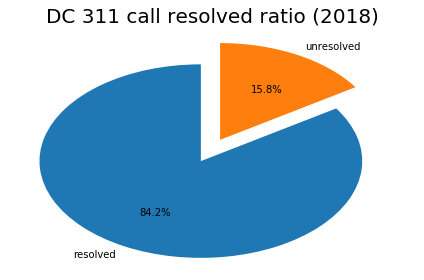

In [5]:
#ploting pie chart for resolved ratio
plt.pie(df.resolved.value_counts(),
       labels=['resolved', 'unresolved'],
       explode=(0.15, 0.1),
       startangle=90,
       autopct='%1.1f%%')
plt.title("DC 311 call resolved ratio (2018)", size=20)
plt.tight_layout()
plt.show();

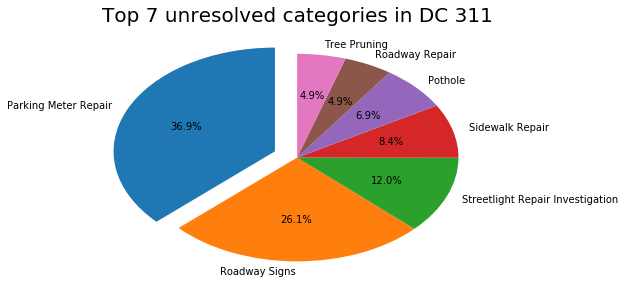

In [6]:
# top 7 unresolved cases by service code description
top7us=df[df.resolved==0]['servicecodedescription'].value_counts()[:7]

# ploting the pie chart
plt.pie(top7us,
       labels=top7us.index,
       explode=(0.15,0,0,0,0,0,0),
       startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.title("Top 7 unresolved categories in DC 311", size=20)
plt.show();

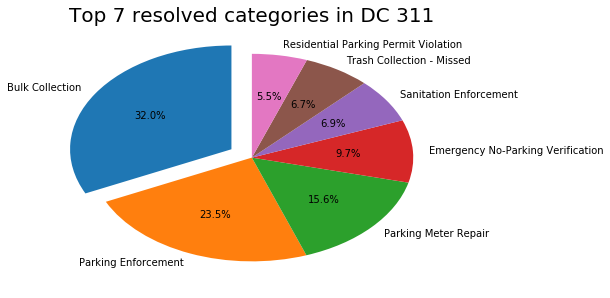

In [7]:
# top 7 unresolved cases by service code description
top7s=df[df.resolved==1]['servicecodedescription'].value_counts()[:7]

# ploting the pie chart
plt.pie(top7s,
       labels=top7s.index,
       explode=(0.15,0,0,0,0,0,0),
       startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.title("Top 7 resolved categories in DC 311", size=20)
plt.show();

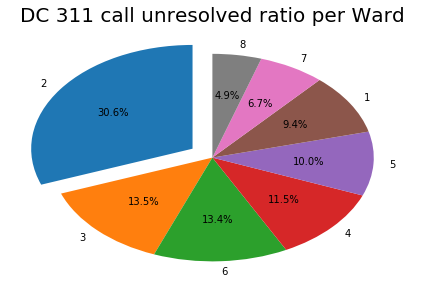

In [8]:
#top 7 unresolved cases per ward
wardc = df[df.resolved==0]['ward'].value_counts()[:8]


#ploting the pie chart
plt.pie(wardc,
       labels=wardc.index,
       explode=(0.15,0,0,0,0,0,0,0),
       startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.title("DC 311 call unresolved ratio per Ward", size=20)
plt.show();

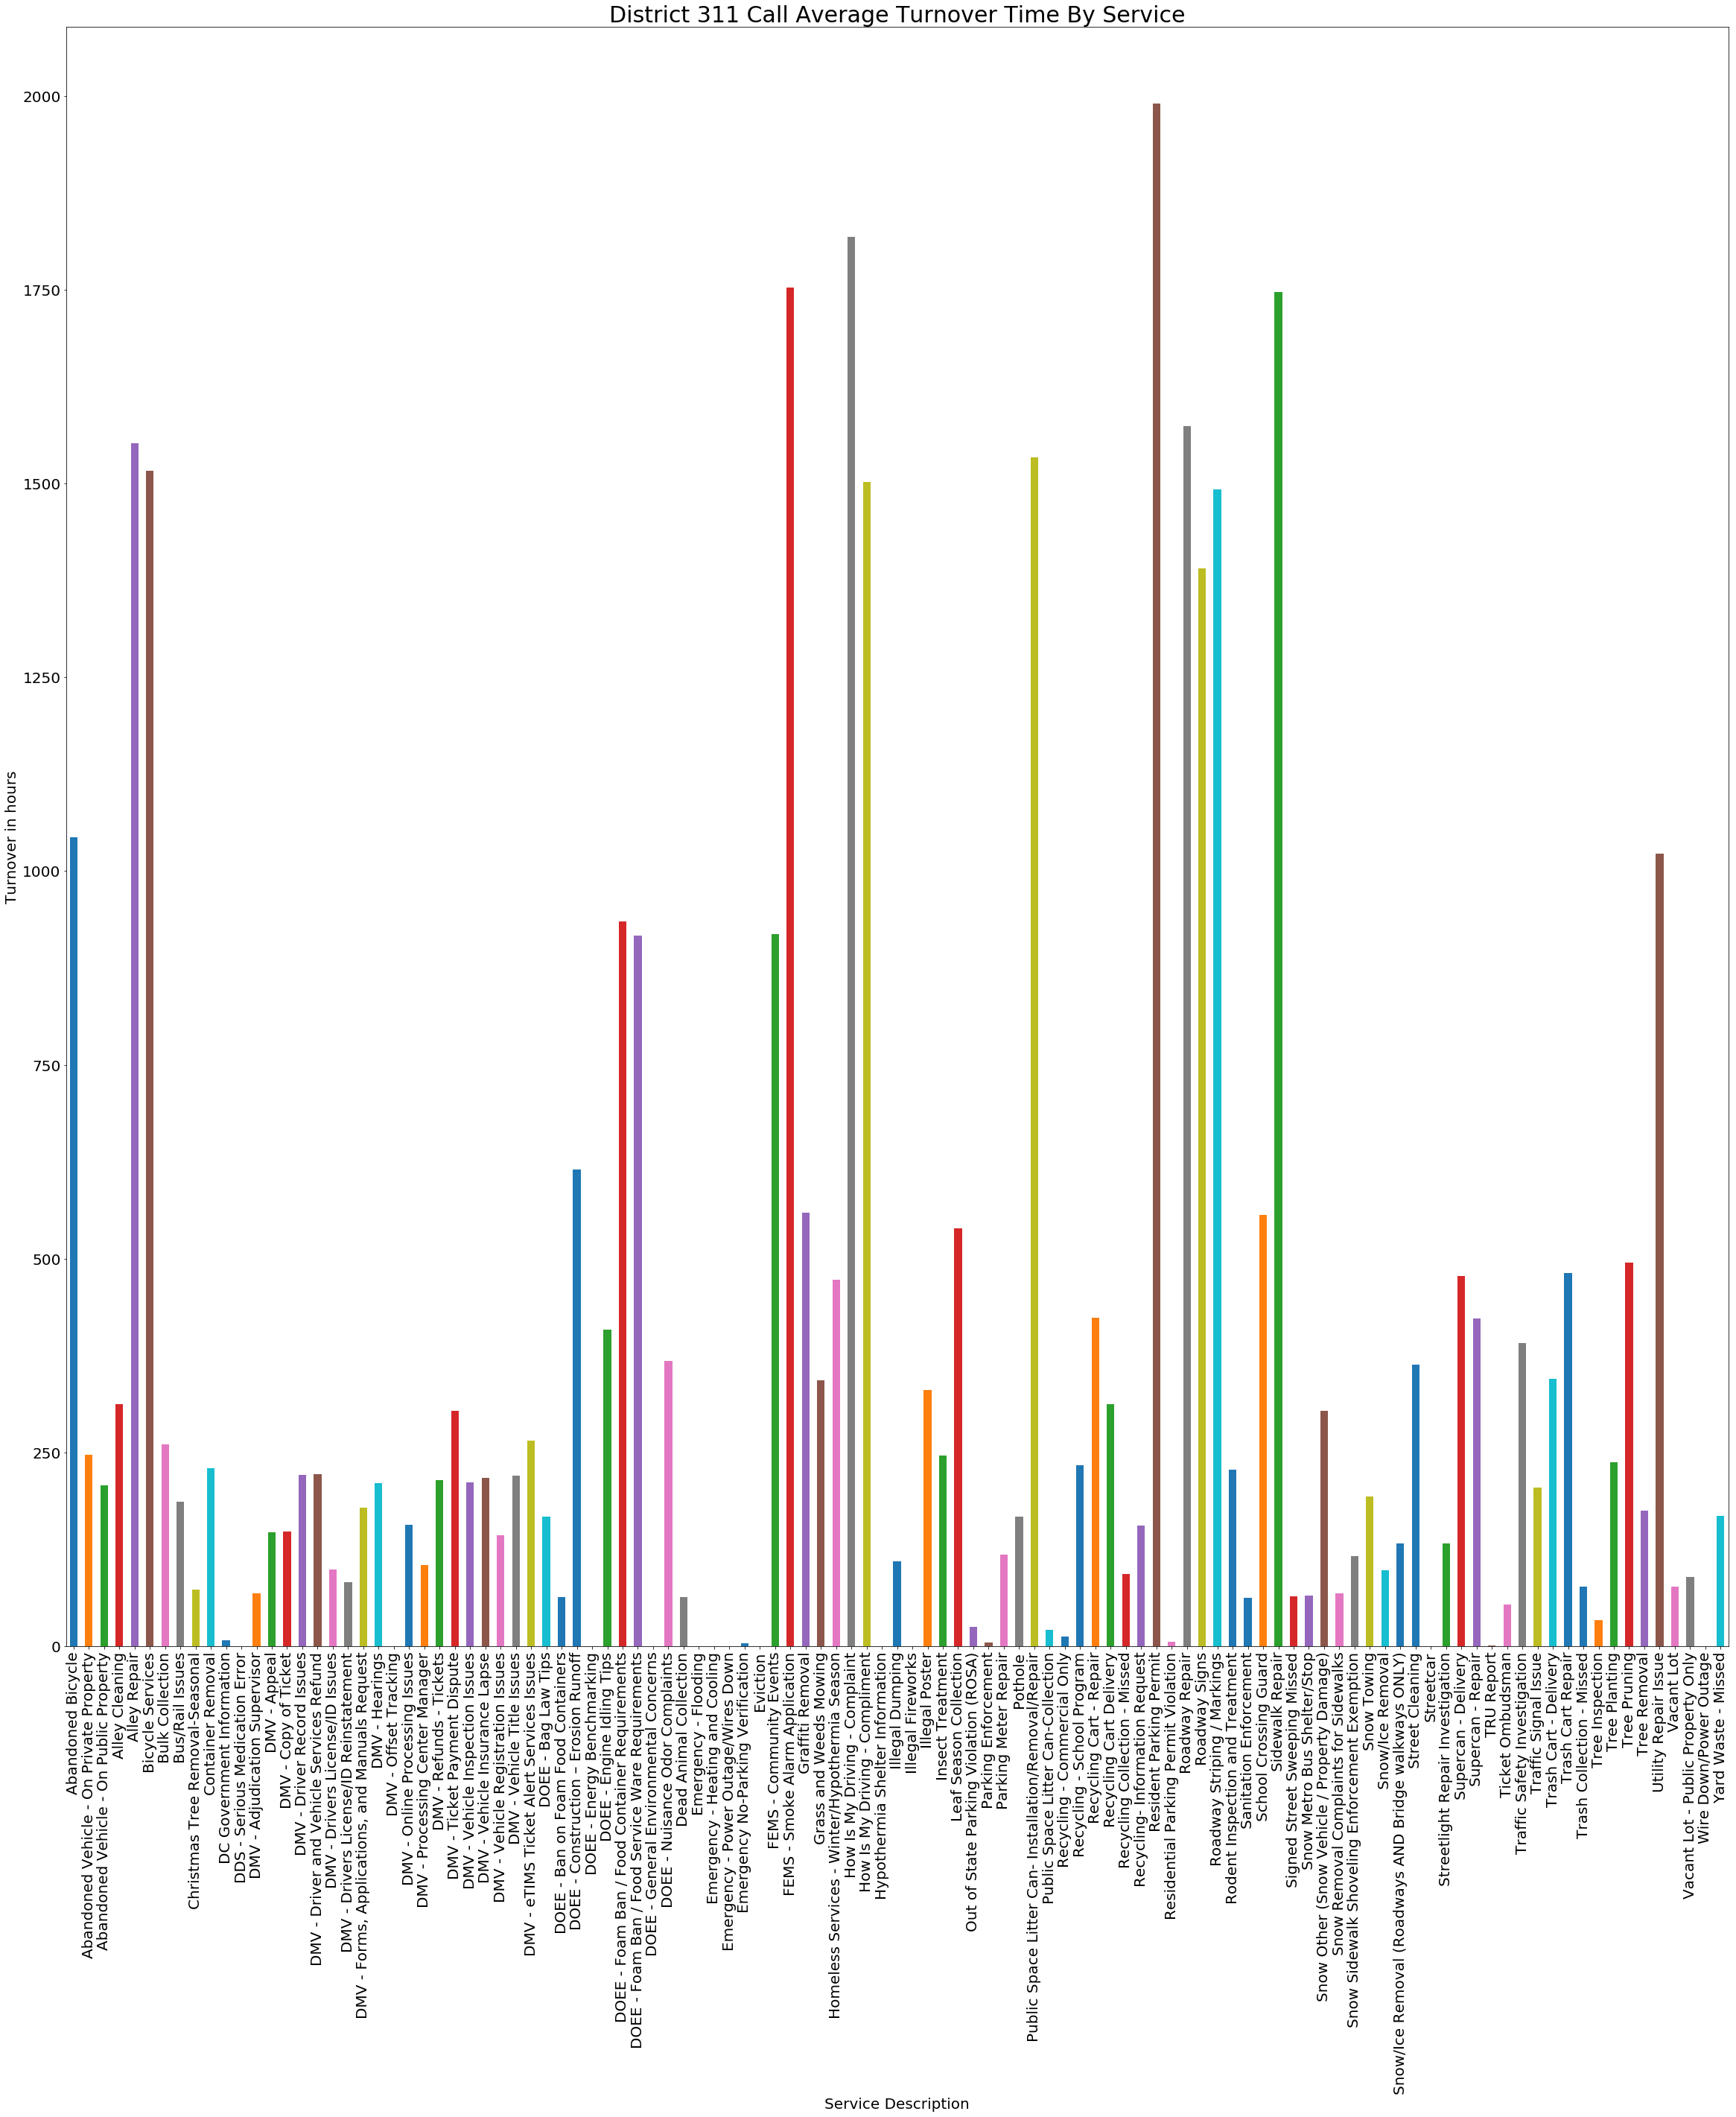

In [46]:
#turnover average ratio by service

df.groupby(['servicecodedescription'])['turnover'].agg('mean').plot(figsize=(40, 40), kind='bar')
plt.xticks(size=20)
plt.xlabel('Service Description', size=20)
plt.title('District 311 Call Average Turnover Time By Service', size=30)
plt.yticks(size=20)
plt.ylabel('Turnover in hours', size=20);